<a href="https://colab.research.google.com/github/UNT-CSCE-Projects/US_stock_market_prediction/blob/ml-farhan/Optiver_Trading_at_the_close.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Optiver - Trading at the Close
## Predict US stocks closing movements

# Data import

In [1]:
import os.path
import json

api_token = {"username":"farhanarrafi","key":"5d6fda1adf219a27359ba81c70803e9a"}


if not os.path.isdir('/root/.kaggle'):
  ! mkdir ~/.kaggle
  ! touch ~/.kaggle/kaggle.json
  with open('/root/.kaggle/kaggle.json', 'w') as file:
      json.dump(api_token, file)
  !chmod 600 ~/.kaggle/kaggle.json

In [2]:

if not os.path.isfile('train.csv'):
  ! kaggle competitions download -c 'optiver-trading-at-the-close'
  ! unzip optiver-trading-at-the-close.zip
  ! rm -rf optiver-trading-at-the-close.zip
  ! rm -rf sample_data/

 97% 194M/201M [00:01<00:00, 132MB/s]
100% 201M/201M [00:01<00:00, 115MB/s]
Archive:  optiver-trading-at-the-close.zip
  inflating: example_test_files/revealed_targets.csv  
  inflating: example_test_files/sample_submission.csv  
  inflating: example_test_files/test.csv  
  inflating: optiver2023/__init__.py  
  inflating: optiver2023/competition.cpython-310-x86_64-linux-gnu.so  
  inflating: public_timeseries_testing_util.py  
  inflating: train.csv               


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import Pipeline


train_dataset = pd.read_csv('train.csv')

train_dataset_row_17 = train_dataset[train_dataset['stock_id'] == 17]
train_dataset_row_17.tail(10)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5235997,17,480,450,9149818.35,-1,0.996902,59289903.31,0.948306,0.971091,0.996817,57056.96,0.997052,276931.68,0.996857,7.590056,26445,480_450_17
5236197,17,480,460,4254932.96,-1,0.997520,64184788.69,0.996114,0.996412,0.997371,6083.22,0.997606,19190.05,0.997428,0.209808,26446,480_460_17
5236397,17,480,470,548463.63,-1,0.997478,67891258.03,0.997115,0.997286,0.997435,103421.37,0.997712,10766.30,0.997686,-0.780225,26447,480_470_17
5236597,17,480,480,138406.13,1,0.997968,69163656.11,0.998032,0.998032,0.997712,49150.50,0.997968,9364.40,0.997927,-0.920296,26448,480_480_17
5236797,17,480,490,175001.65,1,0.997861,69187583.95,0.998032,0.997925,0.997648,93614.00,0.997925,566990.20,0.997688,0.890493,26449,480_490_17
5236997,17,480,500,175001.65,1,0.997861,69187583.95,0.998032,0.997925,0.997712,60384.90,0.997925,422316.40,0.997739,2.239943,26450,480_500_17
5237197,17,480,510,235525.01,1,0.997798,69187583.95,0.998032,0.997819,0.997627,195649.08,0.997861,397944.50,0.997704,0.519752,26451,480_510_17
5237397,17,480,520,1377962.08,1,0.997520,69187583.95,0.998032,0.997563,0.997371,2807.64,0.997563,297667.08,0.997373,3.570318,26452,480_520_17
5237597,17,480,530,235525.01,1,0.997755,69187583.95,0.998032,0.997776,0.997584,10296.88,0.997776,273856.05,0.997591,5.029440,26453,480_530_17
5237797,17,480,540,235525.01,1,0.997755,69187583.95,0.998032,0.997776,0.997691,77702.94,0.997755,73494.84,0.997724,-2.920031,26454,480_540_17


# Data Preprocessing

In [4]:
train = train_dataset_row_17.drop(axis='columns', columns=['stock_id', 'date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag', 'reference_price','matched_size','far_price', 'near_price','bid_price','bid_size','ask_price','ask_size','wap','row_id'])
train = train.set_index('time_id')

In [5]:
standard_deviation = train['target'].std()
standard_deviation

8.592792472682557

In [6]:
mean = train['target'].mean()
mean

0.06302402054991493

In [7]:
max = train['target'].max()
max

81.29001

In [8]:
min = train['target'].min()

<Axes: >

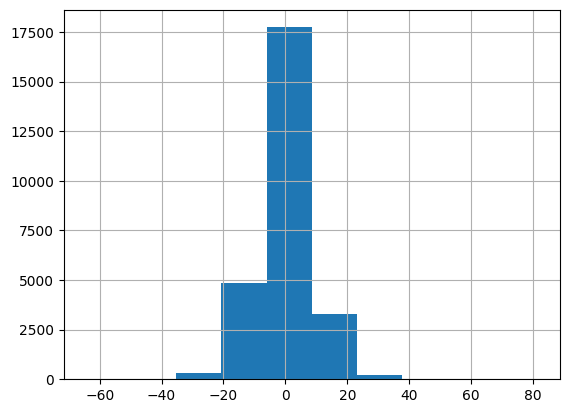

In [9]:

train['target'].hist()

In [10]:
# train_with_positive_outlier = train[train['target'] >= (mean + standard_deviation*3)]
# train_with_negative_outlier = train[train['target'] <= (mean + standard_deviation*3)]
# train_without_outlier = train - train_with_positive_outlier
# train_without_outlier = train - train_with_negative_outlier
# train_without_outlier['target'].hist()

In [11]:
train.tail(5)

,target
time_id,
26450,2.239943
26451,0.519752
26452,3.570318
26453,5.029440
26454,-2.920031


# Visualisation

<Axes: title={'center': 'Plot of target value of Stock 17 for the first 1 minute'}, xlabel='Time in 10 seconds interval', ylabel='Target value of stock'>

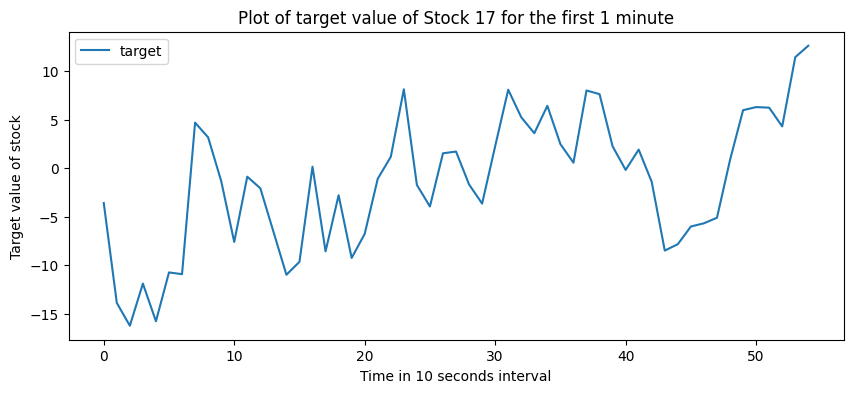

In [12]:
start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes

train[0:55].plot(xlabel='Time in 10 seconds interval', ylabel='Target value of stock', figsize=(10,4), title='Plot of target value of Stock 17 for the first 1 minute')

# Seasonality Analysis

## Seasonal-Trend decomposition using LOESS (STL)
[Seasonal Decomposition](https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html)

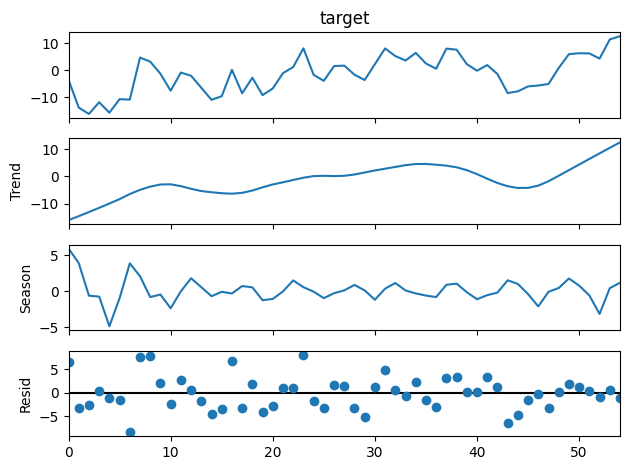

In [13]:
from statsmodels.tsa.seasonal import STL

start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes

stl = STL(train['target'][start:end], period=6)
res = stl.fit()
fig = res.plot()

## Multiple Seasonality Decomposition

[Multiple Seasonality Decomposition](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.MSTL.html)

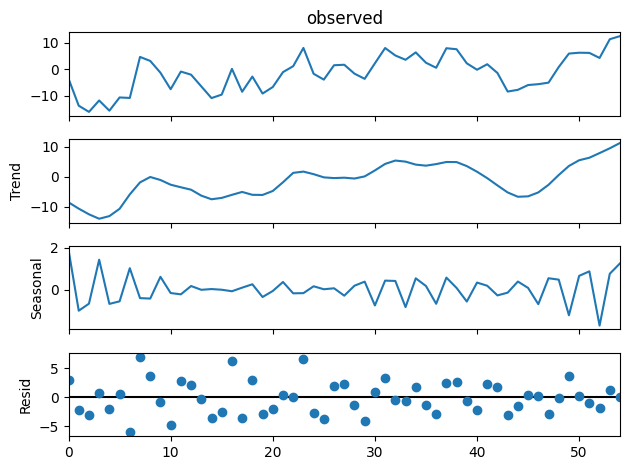

In [14]:
from statsmodels.tsa.seasonal import MSTL

start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes

mstl = MSTL(train['target'][start:end], periods=3, iterate=2)
res = mstl.fit()
fig = res.plot()

# Trend Extracting (Moving Average)

## Simple Moving Average

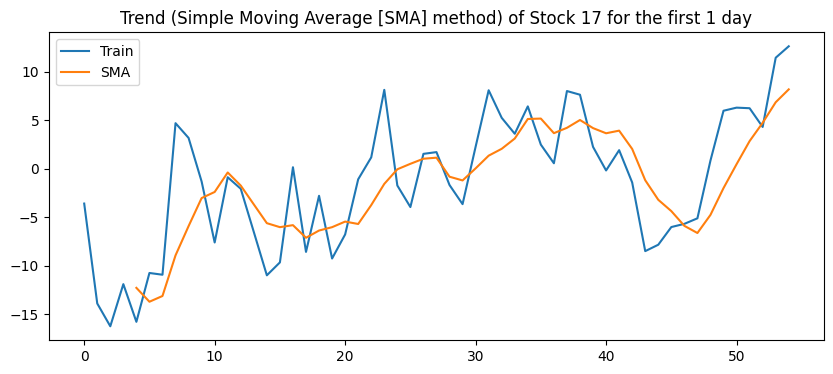

In [15]:
import matplotlib.pyplot as plt

start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes


moving_average = train[start:end].rolling(window=5).mean()

y1 = train['target']
y2 = moving_average

plt.figure(figsize=(10,4))
plt.title('Trend (Simple Moving Average [SMA] method) of Stock 17 for the first 1 day')
plt.plot(y1[start:end], label='Train')
plt.plot(y2[start:end], label='SMA')
plt.legend()
plt.show()


## Weighted Moving Average

In [16]:
weights = [0.1,0.2,0.3,0.4]
weighted_moving_average = train['target'][start:end].rolling(4).apply(lambda x: sum(weights*x) / sum(weights), raw=True)

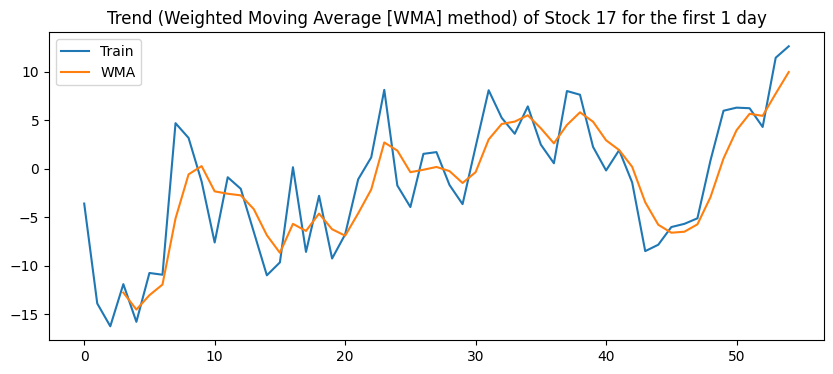

In [17]:
start = 0 # start of day 1
end = 55 # end of day 1 -> 6(one reading each 10 seconds) * 9 minutes

y1 = train['target']
y2 = weighted_moving_average


plt.figure(figsize=(10,4))
plt.title('Trend (Weighted Moving Average [WMA] method) of Stock 17 for the first 1 day')
plt.plot(y1[start:end], label='Train')
plt.plot(y2[start:end], label='WMA')
plt.legend()
plt.show()

In [18]:
# Exponential Smoothing (Exponential Moving Average)
exponential_smoothing_1 = train[start:end].ewm(span=4, adjust=False).mean()
exponential_smoothing_2 = exponential_smoothing_1.ewm(span=4, adjust=False).mean()
exponential_smoothing_3 = exponential_smoothing_2.ewm(span=4, adjust=False).mean()

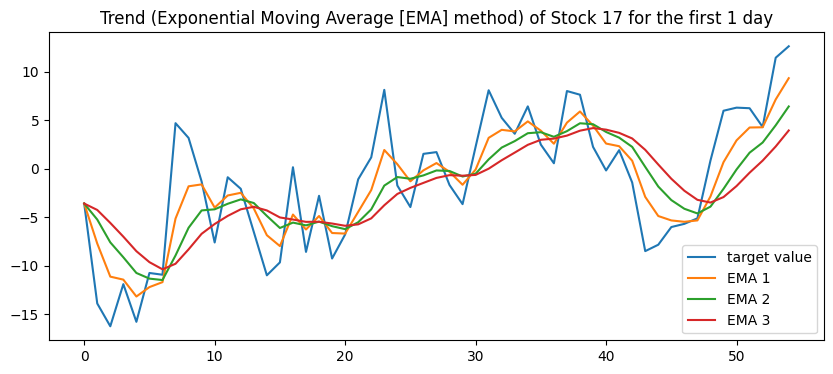

In [19]:
y1 = train
y2 = exponential_smoothing_1
y3 = exponential_smoothing_2
y4 = exponential_smoothing_3

start = 0
end = 55

plt.figure(figsize=(10,4))
plt.title('Trend (Exponential Moving Average [EMA] method) of Stock 17 for the first 1 day')
plt.plot(y1[start:end], label = 'target value')
plt.plot(y2[start:end], label='EMA 1')
plt.plot(y3[start:end], label='EMA 2')
plt.plot(y4[start:end], label='EMA 3')
plt.legend()
plt.show()

# De-Trending the time series

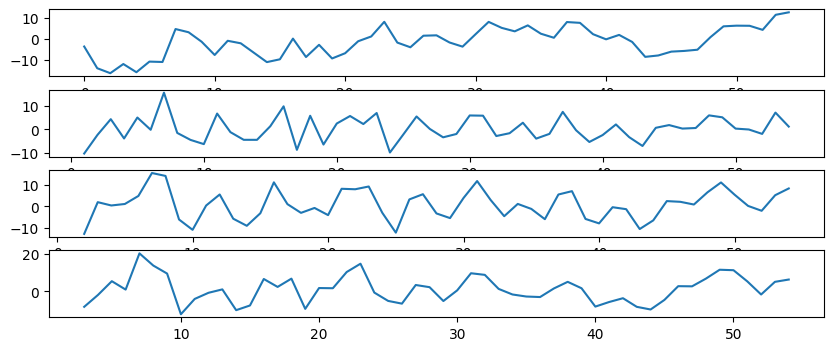

In [20]:
start = 0
end = 55

y1 = train[start:end]
y2 = train[start:end].diff(1)
y3 = train[start:end].diff(2)
y4 = train[start:end].diff(3)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,4))
#title('De-trending of Stock 17 for the first 1 minute')
ax1.plot(y1[start:end], label='target value')
ax2.plot(y2[start:end], label='1 Differenced')
ax3.plot(y3[start:end], label='2 Differenced')
ax4.plot(y4[start:end], label='3 Differenced')
#plt.legend()
plt.show()

# ACF for finding Q value

[Finding P, D, Q](https://analyticsindiamag.com/quick-way-to-find-p-d-and-q-values-for-arima/)

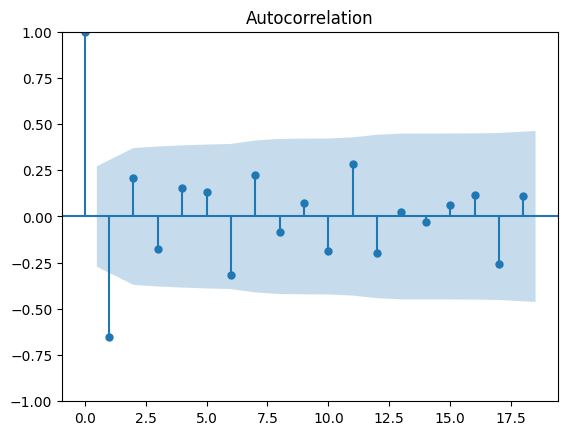

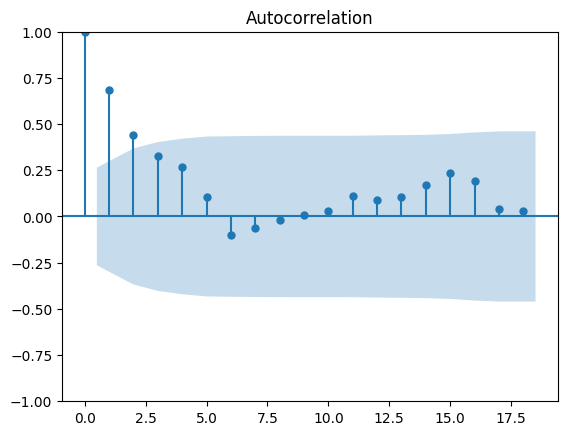

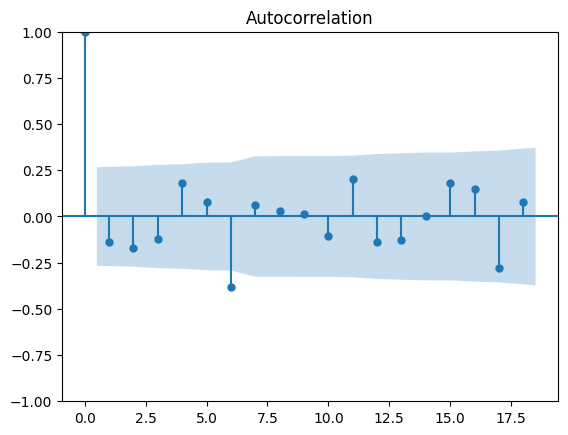

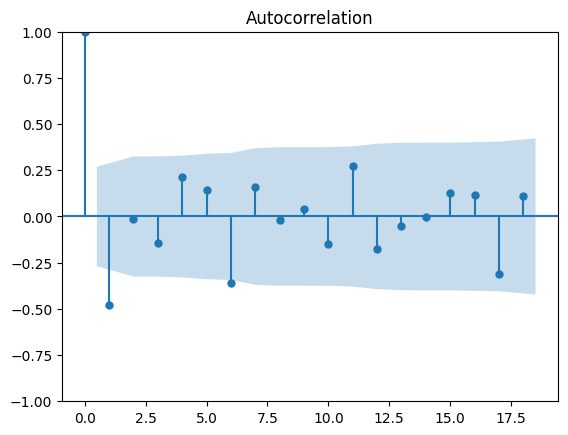

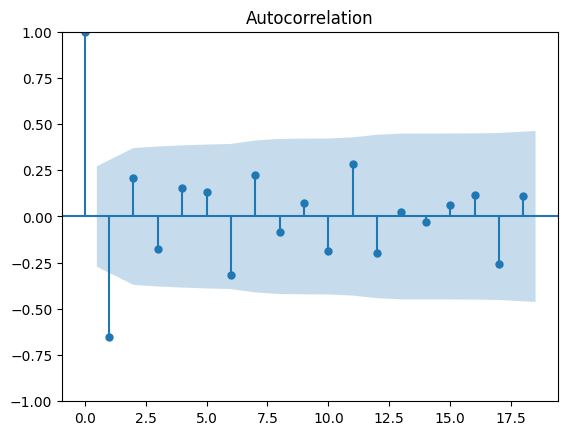

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,4))
plot_acf(train[start:end])
plot_acf(train[start:end].diff().dropna())
plot_acf(train[start:end].diff().diff().dropna())
plot_acf(train[start:end].diff().diff().diff().dropna())

# PACF for finding P value

We ignore lag 1.

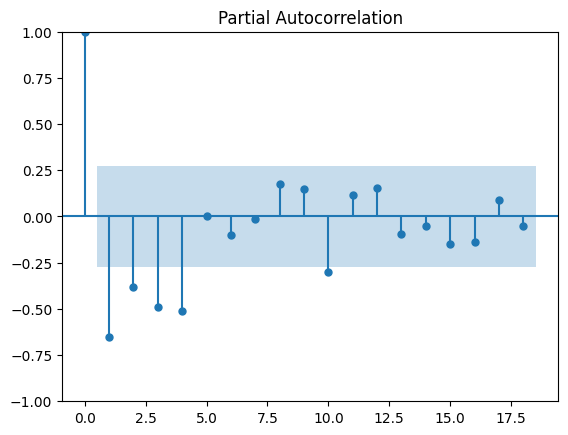

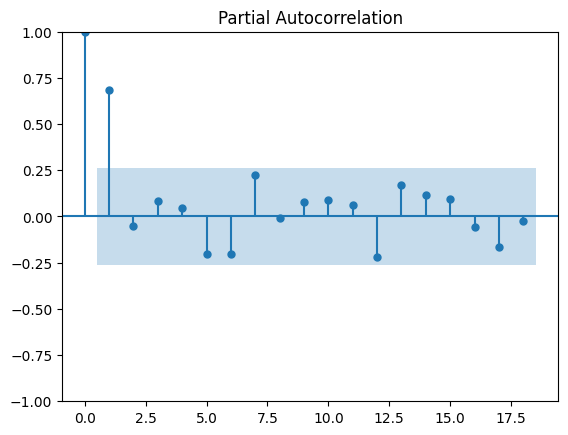

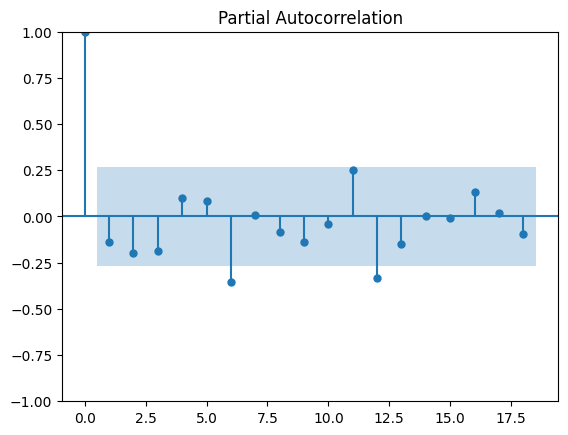

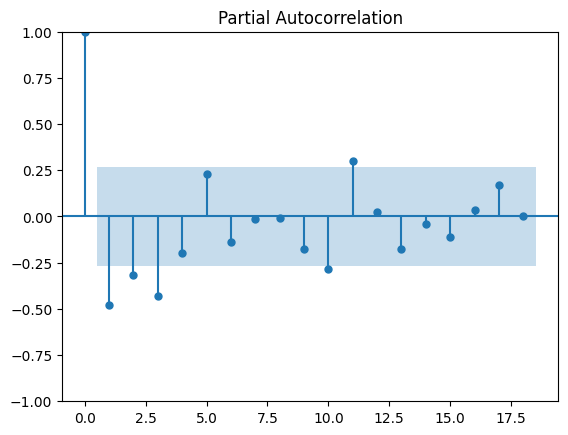

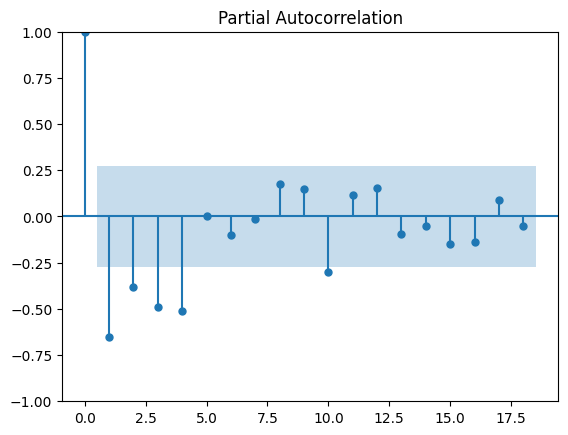

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf


# fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10, 4))
plot_pacf(train[start:end])
plot_pacf(train[start:end].diff().dropna())
plot_pacf(train[start:end].diff().diff().dropna())
plot_pacf(train[start:end].diff().diff().diff().dropna())

In [23]:
detrended_target1 = train - exponential_smoothing_1
detrended_target2 = train - exponential_smoothing_2
detrended_target3 = train - exponential_smoothing_3

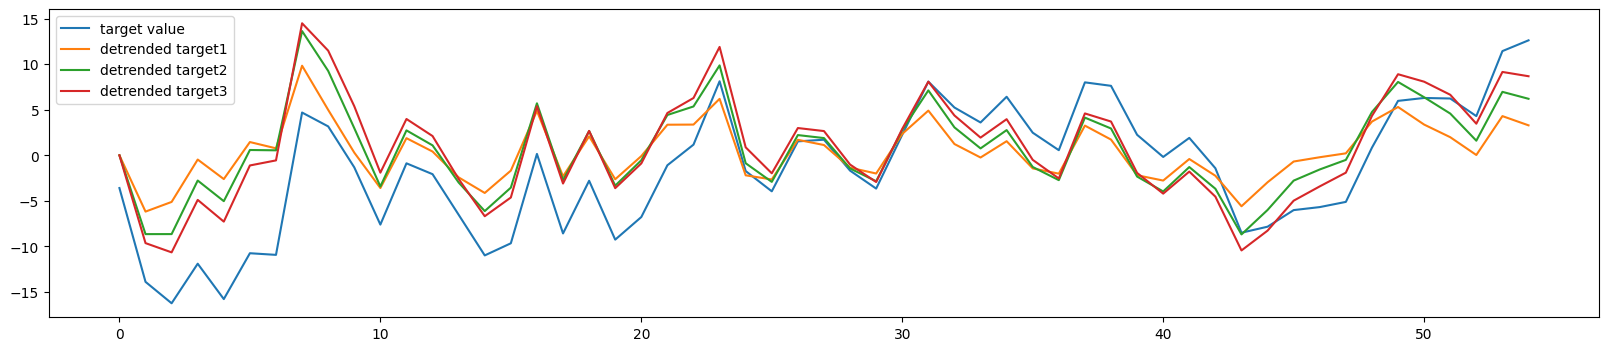

In [24]:

start = 0
end = 55

y1 = train
y2 = detrended_target1
y3 = detrended_target2
y4 = detrended_target3

plt.figure(figsize=(20,4))
plt.plot(y1[start:end], label='target value')
plt.plot(y2[start:end], label='detrended target1')
plt.plot(y3[start:end], label='detrended target2')
plt.plot(y4[start:end], label='detrended target3')
plt.legend()
plt.show()

# plt.figure(figsize=(20,4))
# plt.plot(x[541:1080],y2[541:1080], label='detrended target')
# plt.legend()
# plt.show()

# Testing for stationary

In [25]:
from statsmodels.tsa.stattools import adfuller

start = 0
end = 55

lag= 1
regression = 'c'

adfuller_es = adfuller(train[start:end], maxlag=lag, autolag=None, regression=regression)

adfuller_diff1 = adfuller(train[start:end].diff().dropna(), maxlag=lag, autolag=None, regression=regression)
adfuller_diff2 = adfuller(train[start:end].diff().diff().dropna(), maxlag=lag, autolag=None, regression=regression)
adfuller_diff3 = adfuller(train[start:end].diff().diff().diff().dropna(), maxlag=lag, autolag=None, regression=regression)

labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used']

def parseAdfResult(adfResult):
  for value, label in zip(adfResult, labels):
    print(label+' : '+str(value))
  if adfResult[1] <= 0.05:
    print('Data is stationary')
  else:
    print('Data is non stationary.')

print(parseAdfResult(adfuller_es))
print(parseAdfResult(adfuller_diff1))
print(parseAdfResult(adfuller_diff2))
print(parseAdfResult(adfuller_diff3))

ADF test statistics : -2.492941277117412
P-value : 0.11720124847129576
#Lags used : 1
Number of observation used : 53
Data is non stationary.
None
ADF test statistics : -6.8039095521806665
P-value : 2.201423168447548e-09
#Lags used : 1
Number of observation used : 52
Data is stationary
None
ADF test statistics : -8.79293050602405
P-value : 2.215404470112563e-14
#Lags used : 1
Number of observation used : 51
Data is stationary
None
ADF test statistics : -9.750124377809076
P-value : 8.057437275573755e-17
#Lags used : 1
Number of observation used : 50
Data is stationary
None


# ADF and KPSS Test comparison
  Reference: https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html

In [26]:
# def adf_test(timeseries):
#     print("Results of Dickey-Fuller Test:")
#     #dftest = adfuller(timeseries, autolag="AIC")
#     dftest = adfuller(timeseries, maxlag=lag, autolag=None)
#     dfoutput = pd.Series(
#         dftest[0:4],
#         index=[
#             "Test Statistic",
#             "p-value",
#             "#Lags Used",
#             "Number of Observations Used",
#         ],
#     )
#     for key, value in dftest[4].items():
#         dfoutput["Critical Value (%s)" % key] = value
#     print(dfoutput)

# print(adf_test(train[start:end]))
# # print(adf_test(exponential_smoothing_1[start:end]))
# # print(adf_test(exponential_smoothing_2[start:end]))
# # print(adf_test(exponential_smoothing_3[start:end]))

In [27]:
# from statsmodels.tsa.stattools import kpss

# start = 0
# end = 55

# def kpss_test(timeseries):
#     print("Results of KPSS Test:")
#     kpsstest = kpss(timeseries, regression="c", nlags="auto")
#     kpss_output = pd.Series(
#         kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
#     )
#     for key, value in kpsstest[3].items():
#         kpss_output["Critical Value (%s)" % key] = value
#     print(kpss_output)

# print(kpss_test(train[start:end].dropna()))
# print(kpss_test(train[start:end].diff().dropna()))
# print(kpss_test(train[start:end].diff().diff().dropna()))
# print(kpss_test(train[start:end].diff().diff().diff().dropna()))

# ARIMA (Auto Regression Integrated Moving Average

### Guides:
1. [ARIMA PDQ Value Selection](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_internet.html)
2. [SARIMAX Into](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html)
3. [Seasonality in time series data](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_seasonal.html)
4. [Multiple Seasonal-Trend decomposition using LOESS](https://www.statsmodels.org/dev/examples/notebooks/generated/mstl_decomposition.html)
5. [Seasonal-Trend decomposition using LOESS](https://www.statsmodels.org/dev/examples/notebooks/generated/stl_decomposition.html)
6. [Autoregressions](https://www.statsmodels.org/dev/examples/notebooks/generated/autoregressions.html)

In [28]:
# from statsmodels.tsa.arima.model import ARIMA
# from statsmodels.graphics.tsaplots import plot_predict

# start = 0
# end = 55

# # arima_train = ARIMA(train[start:end], order=(4, 1, 5)).fit()
# # arima_exp1 = ARIMA(exponential_smoothing_3[start:end], order=(4, 1, 5)).fit()

# # arima_train = ARIMA(train[start:end-4], order=(1, 1, 3)).fit()
# # arima_diff1 = ARIMA(train[start:end-4].diff(), order=(1, 1, 3)).fit()



[Model Pickling](https://medium.com/@maziarizadi/pickle-your-model-in-python-2bbe7dba2bbb)

In [29]:
# import pickle

# pickle.dump(arima_diff1, open('ARIMA_DIFF1.pkl','wb'))



In [30]:
# # Error calculation

# forecast = arima_train.predict(end-4, end-1, dynamic=True)
# test = train[end-4: end]
# # Compute the mean square error
# mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
# # print(mse)

# baseline_mae = (forecast.to_frame().predicted_mean - test.target).abs().mean()
# print('MAE ARIMA Train: ', baseline_mae)

# forecast = arima_diff1.predict(end-4, end-1, dynamic=True)
# test = train[end-4: end]
# # Compute the mean square error
# mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
# # print(mse)

# baseline_mae = (forecast.to_frame().predicted_mean - test.target).abs().mean()
# print('MAE ARIMA EXP3: ', baseline_mae)

In [31]:
# fig, ax = plt.subplots(figsize=(10, 4))
# plt.title('Prediction of Stock 17 using ARIMA on train data for the 9th minute')
# ax = train.loc[start:end].plot(ax=ax)
# fig = plot_predict(arima_train, end-4, end, dynamic=True, ax=ax)
# plt.show()

# fig, ax = plt.subplots(figsize=(10, 4))
# plt.title('Prediction of Stock 17 using ARIMA on 3rd level Exponential Moving Average train data for the 9th minute')
# ax = train.loc[start:end].plot(ax=ax)
# fig = plot_predict(arima_diff1, end-4, end, dynamic=True, ax=ax)
# plt.show()

In [32]:
# print(arima_train.summary())
# print(arima_train.params)

In [33]:
# print(arima_diff1.summary())
# print(arima_diff1.params)

In [34]:
# from statsmodels.graphics.tsaplots import plot_predict

# start = 0
# end = 55


# # arma_train = ARIMA(train[start:end-9], order=(1, 0, 1)).fit()
# # arma_diff1 = ARIMA(exponential_smoothing_3[start:end-9], order=(1, 0, 1)).fit()
# arma_train = ARIMA(train[start:end-4], order=(1, 0, 3)).fit()
# arma_diff1 = ARIMA(train[start:end-4].diff(), order=(1, 0, 3)).fit()

In [35]:
# import pickle

# pickle.dump(arma_diff1, open('ARMA_DIFF1.pkl','wb'))

In [36]:
# # Error calculation

# start = 0
# end = 55

# forecast = arma_train.predict(end-4, end-1, dynamic=True)
# test = train[end-4: end]
# # Compute the mean square error
# mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
# print(forecast)

# print('MAE ARMA Train: ', baseline_mae)

# day = 1

# start = (day -1) * 55
# end = day * 55

# forecast = arma_diff1.predict(end-4, end-1, dynamic=True)
# test = train[end-4: end]
# # Compute the mean square error
# mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
# # print(mse)

# baseline_mae = (forecast.to_frame().predicted_mean - test.target).abs().mean()
# print('MAE ARMA DIFF1: ', baseline_mae)
# # simple_prediction_mae = (train['simple_prediction'] - train['target']).abs().mean()

# # print(baseline_mae)
# # print('MAE improvement in basis points: ', (baseline_mae-simple_prediction_mae))


In [37]:

# fig, ax = plt.subplots(figsize=(10, 4))
# plt.title('Prediction of Stock 17 for the 9th minute')
# ax = train.loc[start:end].plot(ax=ax)
# fig = plot_predict(arma_train, end-4, end, dynamic=True, ax=ax)
# plt.show()


# fig, ax = plt.subplots(figsize=(10, 4))
# plt.title('Prediction of Stock 17 for the 9th minute')
# ax = train.loc[start:end].plot(ax=ax)
# fig = plot_predict(arma_diff1, end-4, end, dynamic=True, ax=ax)
# plt.show()

# Testing

In [38]:
## Test using other stocks

In [91]:
import time
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf

time_start = time.perf_counter_ns()

train_dataset_row_22 = train_dataset[train_dataset['stock_id'] == 17]

train_22 = train_dataset_row_22.drop(axis='columns', columns=['stock_id', 'date_id','seconds_in_bucket','imbalance_size','imbalance_buy_sell_flag', 'reference_price','matched_size','far_price', 'near_price','bid_price','bid_size','ask_price','ask_size','wap','row_id'])
train_22 = train_22.set_index('time_id')

day = 1
start = (day -1) * 55
end = day * 55

# train_22_acf =  acf(train_22[start:end-4], alpha=0.05)

# train_22_pacf = pacf(train_22[start:end-4], alpha=0.05)

arma_diff1 = ARIMA(train_22[start:end-4].diff(), order=(3, 0, 3)).fit()

forecast = arma_diff1.predict(end-4, end, dynamic=True)
test = train_22[end-4: end]

# mse = ((forecast.to_frame().predicted_mean - test.target) ** 2).mean()
baseline_mae = (forecast.to_frame().predicted_mean - test.target).abs().mean()

time_end = time.perf_counter_ns()

#print((time_end - time_start)/1000000000)

print(f'Time taken: {(time_end - time_start)/1000000000} seconds.')

autocorrelation = acf(forecast, nlags=1)

directionality_error = np.sum(np.abs(autocorrelation[1:])) / len(autocorrelation[1:])

print(f'directionality error: {directionality_error}')

print(f'Mean Absolute error: {baseline_mae}')


0.98129787
Time taken: 0.98129787 seconds.
directionality error: 0.10671775772248529
Mean Absolute error: 9.055782355225219


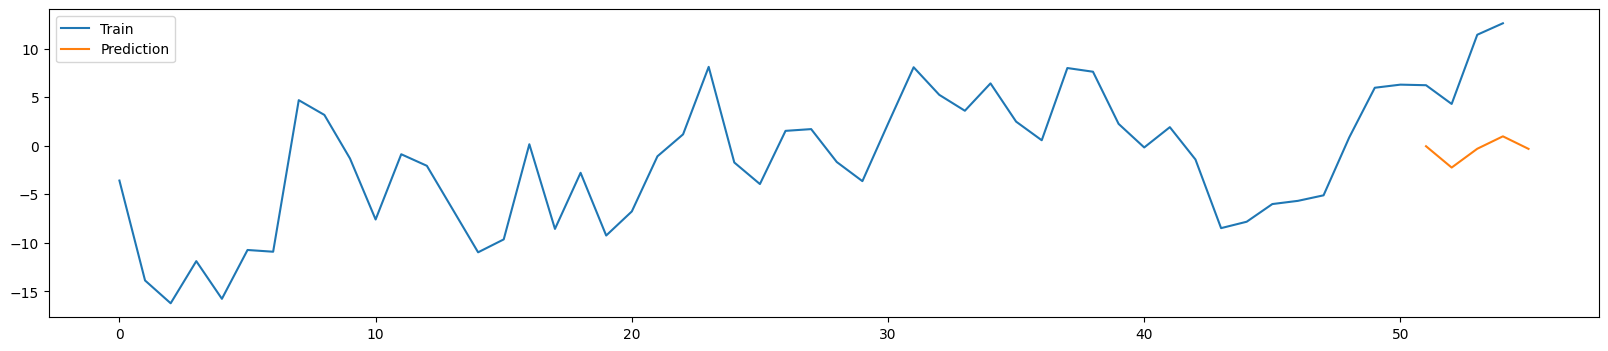

In [92]:
y1 = train_22[start:end]
y2 = forecast

plt.figure(figsize=(20,4))
plt.plot(y1[start:end], label='Train')
plt.plot(y2[start:end], label='Prediction')
plt.legend()
plt.show()

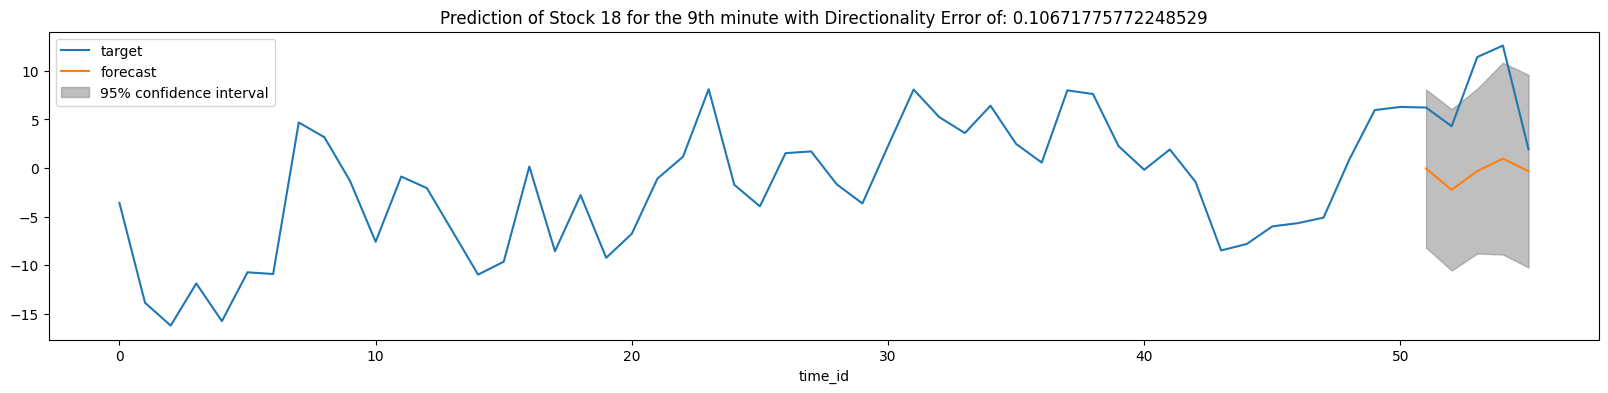

In [93]:
fig, ax = plt.subplots(figsize=(20, 4))
plt.title(f'Prediction of Stock 18 for the 9th minute with Directionality Error of: {directionality_error}')
ax = train_22.loc[start:end].plot(ax=ax)
fig = plot_predict(arma_diff1, end-4, end, dynamic=True, ax=ax)
plt.show()

## Testing using Optiver API

In [42]:
# import optiver2023
# env = optiver2023.make_env()
# iter_test = env.iter_test()

# References:


1.   [Testing code source](https://www.kaggle.com/code/jirkaborovec/optiver-eda-pytorch-models)
2.   [Moving Average source](https://medium.com/@HalderNilimesh/applied-data-science-for-beginners-how-to-calculate-moving-average-using-pandas-dataframe-in-7e5f7944c07a)

